In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import ipywidgets as widgets
from ipywidgets import interact
import itertools



In [2]:
# Defining power spectrum
def p_k(H0=67.5, ombh2=0.022, omch2=0.122, ns=0.965):
    # Set up the cosmological parameters
    pars = camb.model.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=0.00, omk=0)
    pars.InitPower.set_params(ns=ns)

    # Calculate the matter power spectrum
    pars.set_matter_power(redshifts=[0.], kmax=2)
    results = camb.get_results(pars)
    k, _, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)

    return k, pk[0, :]






In [14]:
# defining plot for power spectrum
def plot_P_k(parameter_values, parameter_name):
    plt.figure(figsize=(12, 8))

    for param_value in parameter_values:
        if parameter_name == '$H_{0}$':
            k, pk = p_k(H0=param_value)
        elif parameter_name == '$\Omega_{b}h^{2}$':
            k, pk = p_k(ombh2=param_value)
        elif parameter_name == '$\Omega_{m}h^{2}$':
            k, pk = p_k(omch2=param_value)
        elif parameter_name == '$n_s$':
            k, pk = p_k(ns=param_value)

        label = f'{parameter_name}={param_value}'
        plt.loglog(k, pk, label=label)

    plt.title(f'Matter Power Spectrum with Varying {parameter_name} Values')
    plt.xlabel('k [1/Mpc]')
    plt.ylabel('P(k) [Mpc^3]')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [15]:
# Varying parameter values
hubble_parameters = np.linspace(50, 90, 3)
omega_baryon = np.linspace(0.03, 0.07, 3)
omega_matter = np.linspace(0.1, 0.5, 3)
n_s = np.linspace(0.8, 1.2, 3)



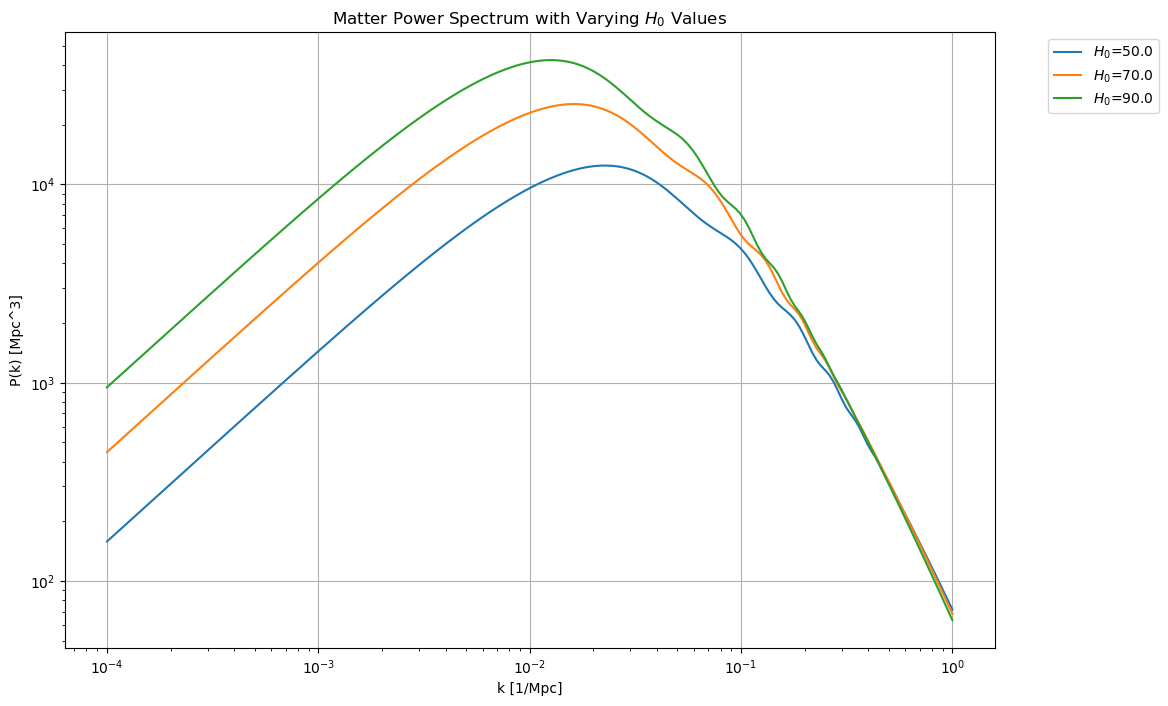

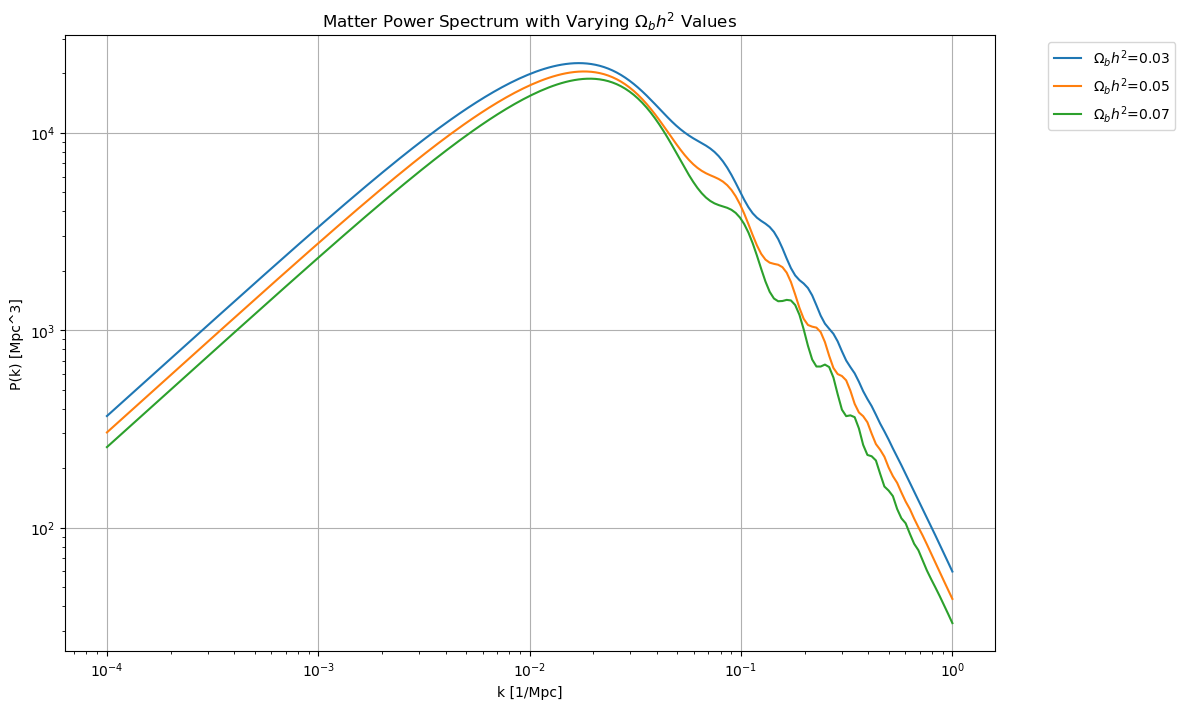

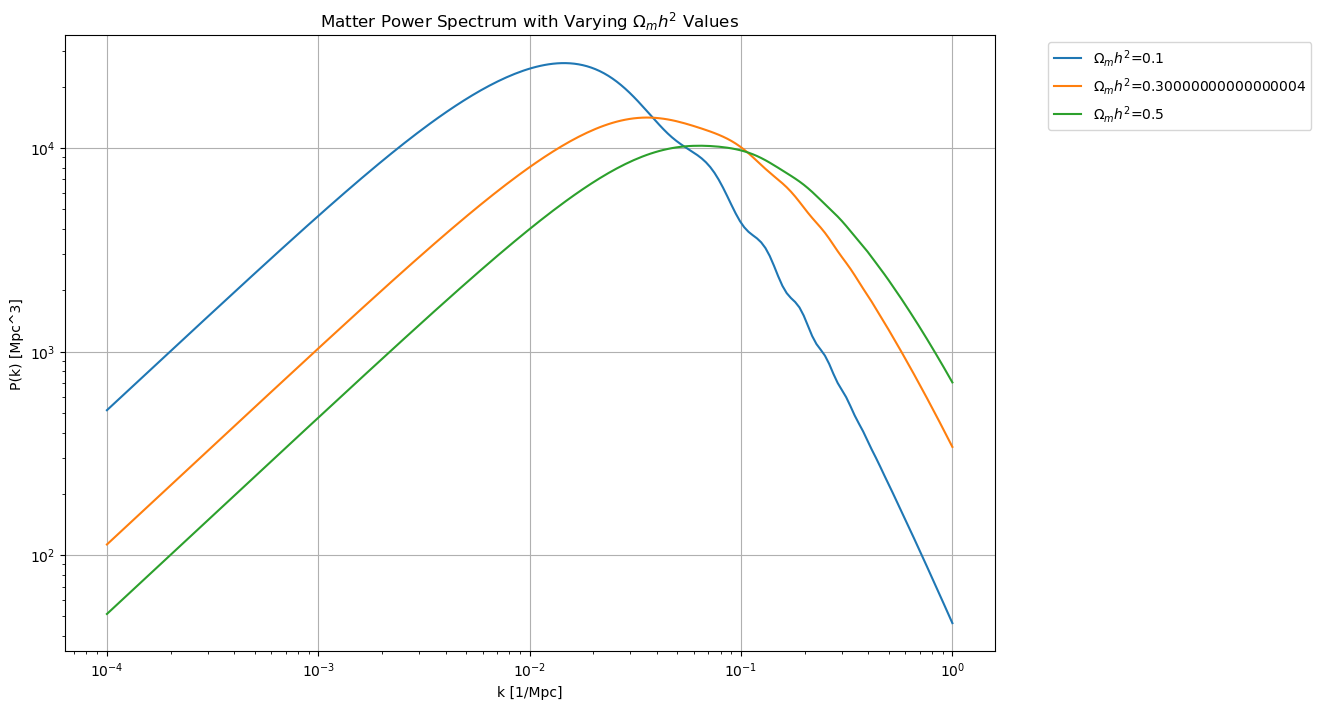

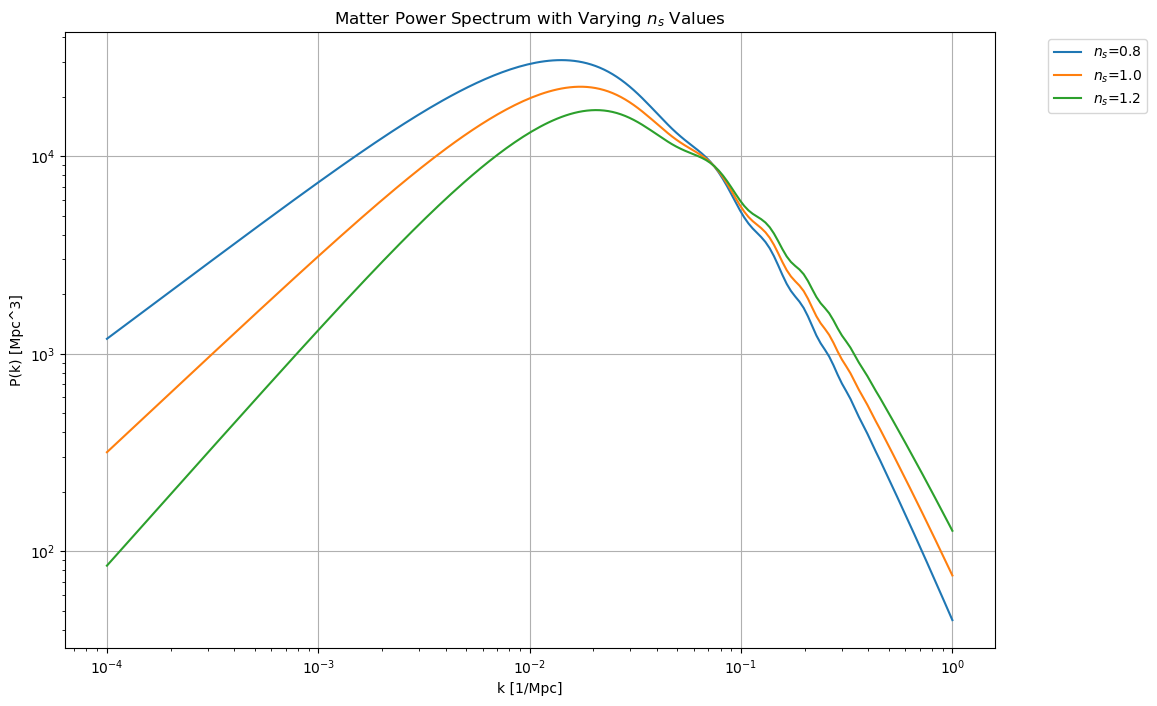

In [16]:
# Plots
plot_P_k(hubble_parameters, '$H_{0}$')
plot_P_k(omega_baryon, '$\Omega_{b}h^{2}$')
plot_P_k(omega_matter, '$\Omega_{m}h^{2}$')
plot_P_k(n_s, '$n_s$')